1- import libraries

In [21]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
import itertools




2-Load test data

In [22]:
test_ds = test_ds
class_names = class_names
num_classes = len(class_names)

print("Classes:", class_names)
print("Number of classes:", num_classes)


Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
Number of classes: 9


3-Load EfficientNetB3 Model

In [23]:
efficientnet_model = keras.models.load_model(
    "Models/EfficientNetB3/efficientnetb3_model.keras"
)

print("EfficientNetB3 loaded successfully!")


EfficientNetB3 loaded successfully!


4-Load ResNet50 Model

In [24]:
resnet_model = keras.models.load_model("resnet50_final.h5")
print("ResNet50 loaded successfully!")


ResNet50 loaded successfully!


5-Load MobileNet Model

In [25]:
mobilenet_model = keras.models.load_model(
    "Models/MobileNet/mobilenet_model.keras"
)

print("MobileNet loaded successfully!")

MobileNet loaded successfully!


6-Evaluation Helper Function


In [26]:
def evaluate_model(model, test_ds):
    y_true = []
    y_pred = []

    for images, labels in test_ds:
        preds = model.predict(images, verbose=0)
        preds = np.argmax(preds, axis=1)
        y_pred.extend(preds)
        y_true.extend(labels.numpy())

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    return acc, prec, rec, f1, y_true, y_pred




7-Evaluate the 3 Models

In [27]:
acc_eff, prec_eff, rec_eff, f1_eff, y_true_eff, y_pred_eff = evaluate_model(efficientnet_model, test_ds)
acc_res, prec_res, rec_res, f1_res, y_true_res, y_pred_res = evaluate_model(resnet_model, test_ds)
acc_mob, prec_mob, rec_mob, f1_mob, y_true_mob, y_pred_mob = evaluate_model(mobilenet_model, test_ds)


d:\project Ai\plant-disease-classification\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


8-Comparison DataFrame

In [28]:
comparison = pd.DataFrame({
    "Model": ["EfficientNetB3", "ResNet50", "MobileNet"],
    "Accuracy": [acc_eff, acc_res, acc_mob],
    "Precision": [prec_eff, prec_res, prec_mob],
    "Recall": [rec_eff, rec_res, rec_mob],
    "F1-score": [f1_eff, f1_res, f1_mob]
})

comparison

,Model,Accuracy,Precision,Recall,F1-score
0,EfficientNetB3,0.878049,0.900071,0.865741,0.852623
1,ResNet50,0.695122,0.807359,0.711700,0.697907
2,MobileNet,0.731707,0.707211,0.732435,0.684139


9-Extract Best Metrics

In [32]:

best_accuracy_model = comparison.loc[comparison["Accuracy"].idxmax(), "Model"]
best_precision_model = comparison.loc[comparison["Precision"].idxmax(), "Model"]
best_recall_model = comparison.loc[comparison["Recall"].idxmax(), "Model"]
best_f1_model = comparison.loc[comparison["F1-score"].idxmax(), "Model"]

comparison

print("Best results among the three models:\n")

print(f"Highest Accuracy:     {best_accuracy_model}")
print(f"Highest Precision:    {best_precision_model}")
print(f"Highest Recall:       {best_recall_model}")
print(f"Highest F1-score:     {best_f1_model}")

Best results among the three models:

Highest Accuracy:     EfficientNetB3
Highest Precision:    EfficientNetB3
Highest Recall:       EfficientNetB3
Highest F1-score:     EfficientNetB3


10-Confusion Matrix Function

In [30]:
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation="nearest")
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()

11-Plot Confusion Matrices

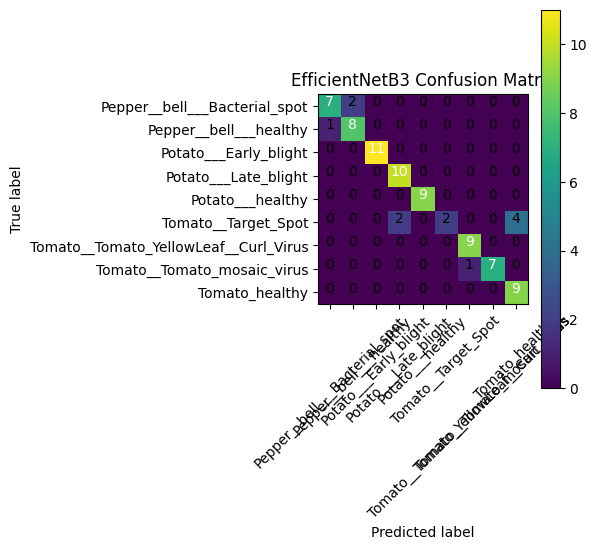

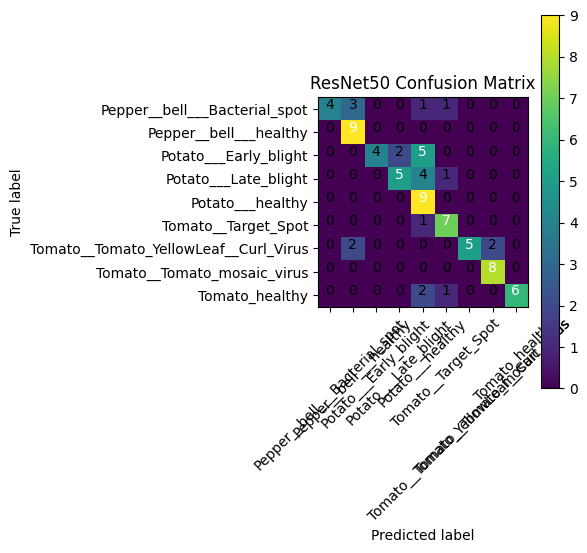

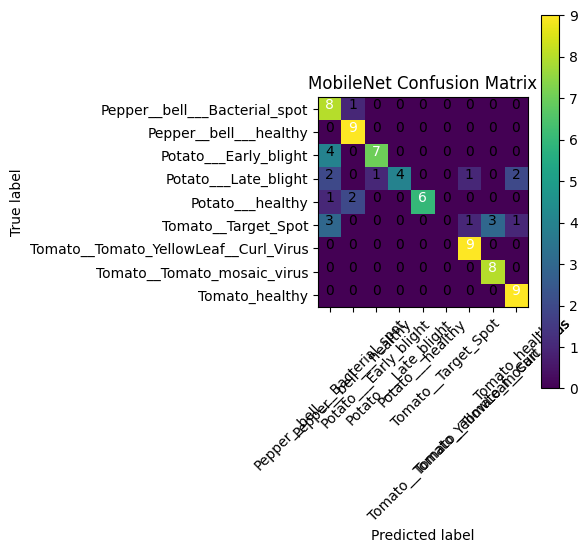

In [31]:
cm_eff = confusion_matrix(y_true_eff, y_pred_eff)
cm_res = confusion_matrix(y_true_res, y_pred_res)
cm_mob = confusion_matrix(y_true_mob, y_pred_mob)

plot_confusion_matrix(cm_eff, class_names, "EfficientNetB3 Confusion Matrix")
plot_confusion_matrix(cm_res, class_names, "ResNet50 Confusion Matrix")
plot_confusion_matrix(cm_mob, class_names, "MobileNet Confusion Matrix")

12-ResNet50 Precision

In [13]:
print("ResNet50 Precision:", prec_res)

ResNet50 Precision: 0.8073593073593073


13-ResNet50 Recall

In [14]:
print("ResNet50 Recall:", rec_res)


ResNet50 Recall: 0.7117003367003367


14-ResNet50 Confusion Matrix

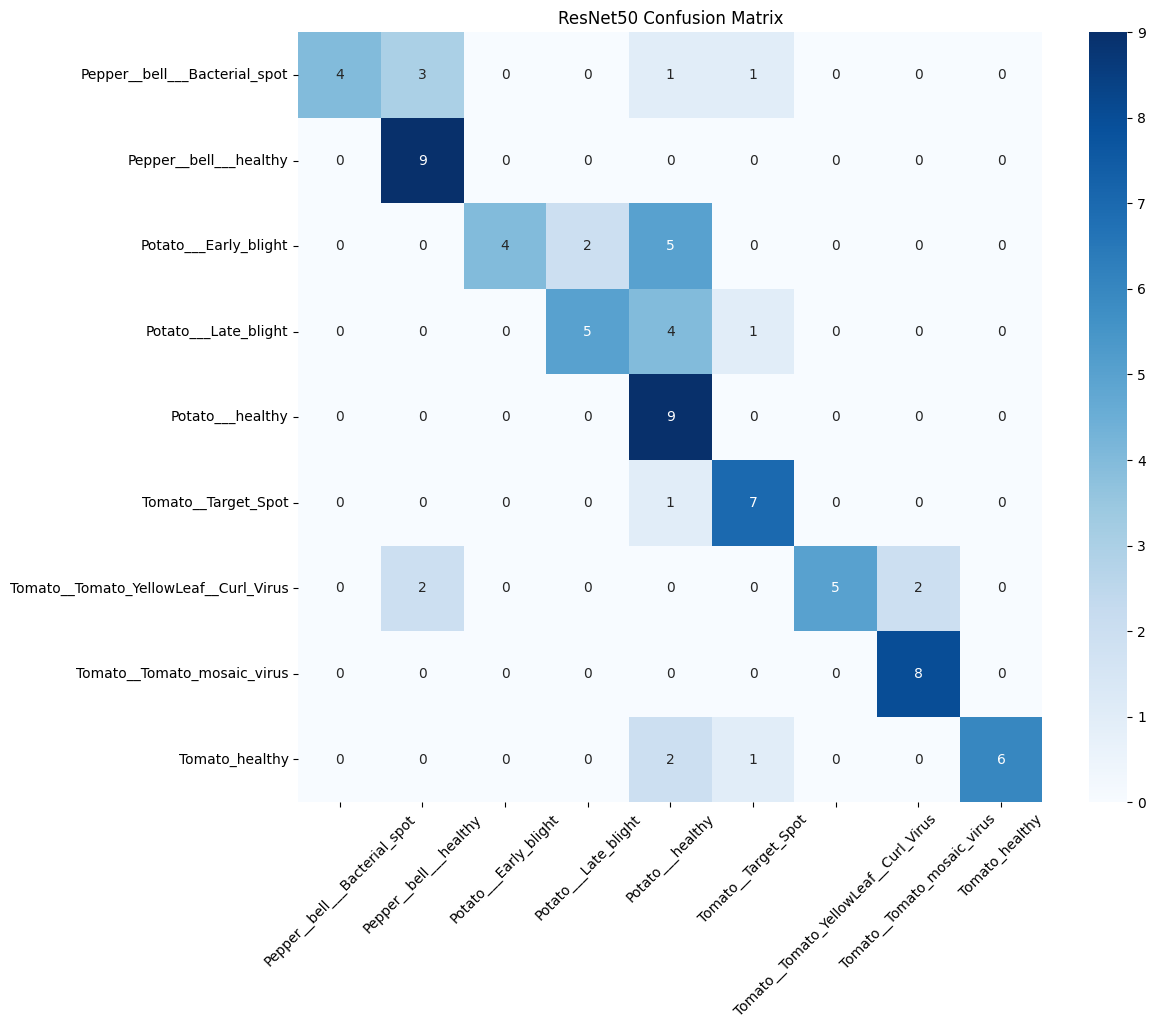

In [15]:
cm_res = confusion_matrix(y_true_res, y_pred_res)
plt.figure(figsize=(12,10))
sns.heatmap(cm_res, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title("ResNet50 Confusion Matrix")
plt.show()

15-MobileNet Accuracy

In [16]:
acc_mob, prec_mob, rec_mob, f1_mob, y_true_mob, y_pred_mob = get_metrics(mobilenet_model, test_ds)
print("MobileNet Accuracy:", acc_mob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
MobileNet Accuracy: 0.7317073170731707


d:\project Ai\plant-disease-classification\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


16-MobileNet Precision

In [17]:
print("MobileNet Precision:", prec_mob)

MobileNet Precision: 0.7072109988776655


17-MobileNet Recall

In [18]:
print("MobileNet Recall:", rec_mob)

MobileNet Recall: 0.7324354657687991


18-MobileNet Confusion Matrix

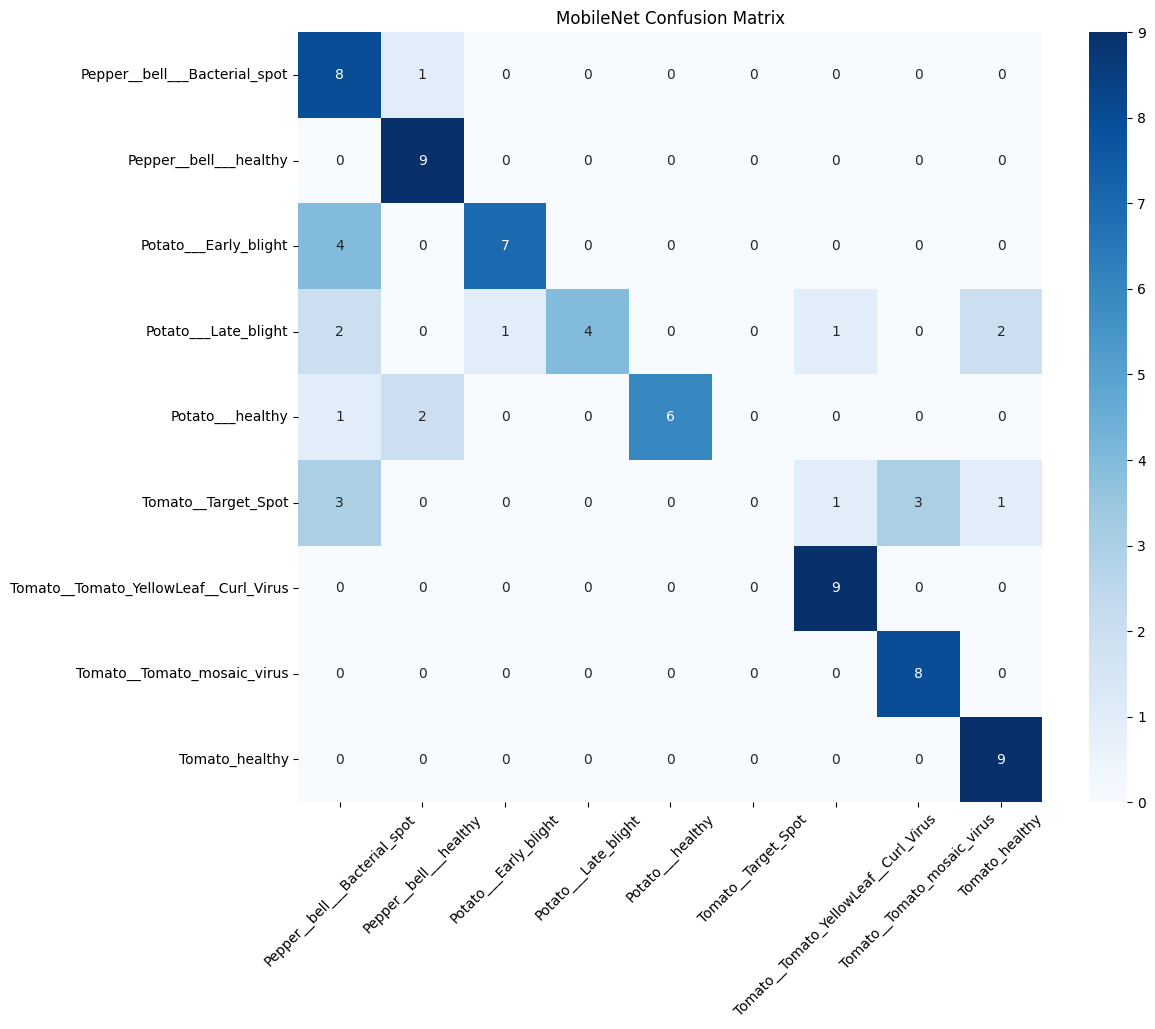

In [19]:
cm_mob = confusion_matrix(y_true_mob, y_pred_mob)
plt.figure(figsize=(12,10))
sns.heatmap(cm_mob, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title("MobileNet Confusion Matrix")
plt.show()


19-Comparison Table

In [20]:
comparison = pd.DataFrame({
    "Model": ["EfficientNetB3", "ResNet50", "MobileNet"],
    "Accuracy": [acc_eff, acc_res, acc_mob],
    "Precision": [prec_eff, prec_res, prec_mob],
    "Recall": [rec_eff, rec_res, rec_mob],
    "Best_F1": [f1_eff, f1_res, f1_mob],
    "Best_Accuracy": [best_acc_eff, best_acc_res, best_acc_mob],
    "Best_Training_Loss": [best_loss_eff, best_loss_res, best_loss_mob],
    "Best_Training_Curve": [best_curve_eff, best_curve_res, best_curve_mob]
})


NameError: name 'pd' is not defined

20-Helper function Grad-Cam

In [43]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0]).numpy().item()  # convert to int safely
        loss = predictions[:, class_idx]
    
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = np.maximum(heatmap,0)/tf.reduce_max(heatmap)
    return heatmap.numpy()



21-Select sample image


In [44]:
import matplotlib.pyplot as plt

sample_image, _ = next(iter(test_ds.take(1)))
sample = sample_image[0].numpy().astype("uint8")
img_array = np.expand_dims(sample/255.0, axis=0)


22-EfficientNetB3

In [45]:
# EfficientNetB3
heatmap_eff = make_gradcam_heatmap(img_array, efficientnet_model.layers[0], "top_conv")

plt.imshow(sample)
plt.imshow(heatmap_eff, cmap="jet", alpha=0.5)
plt.title("Grad-CAM EfficientNetB3")
plt.axis('off')
plt.show()



ValueError: can only convert an array of size 1 to a Python scalar